In [1]:
import ast
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv(r'D:\AKG\Dataset\boids\boids_python2\boids25_test.csv', header=None)
df = df.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)
df = df.apply(lambda x: x.apply(ast.literal_eval) if x.dtype == 'object' else x)
df.columns = ['Index'] + [f'Boid{i}' for i in range(1, 26)]
# df.head

In [11]:
ids = []
x_values = []
y_values = []

row = df.iloc[2]

for i in range(1, len(row)):
    ids.append(int(row[i][0]))
    x_values.append(float(row[i][1]))
    y_values.append(float(row[i][2]))

ids[0], x_values[0], y_values[0]

(0, 2567.6255420418524, 2542.529946615849)

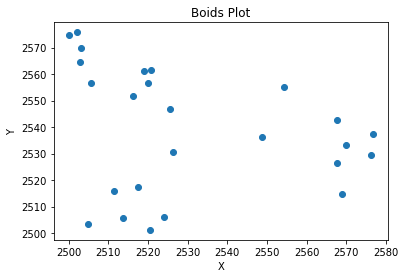

In [12]:
plt.scatter(x_values, y_values)
# for i, id in enumerate(ids):
#     plt.annotate(id, (x_values[i], y_values[i]))
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Boids Plot')
plt.show()

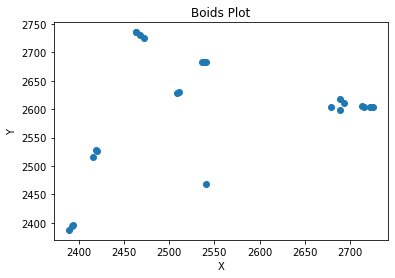

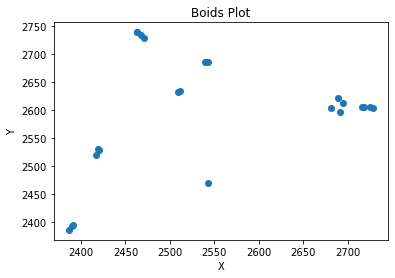

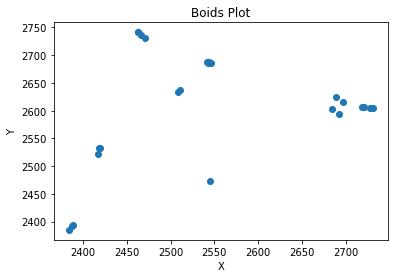

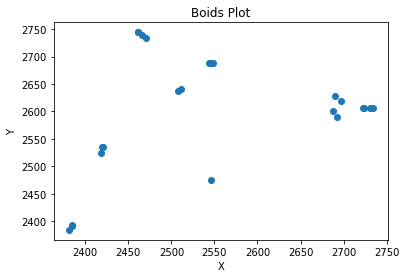

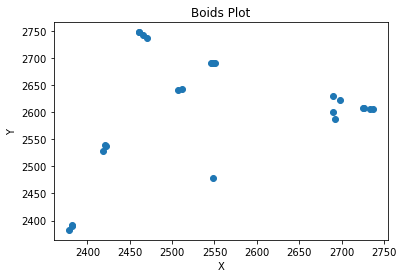

In [13]:
for j in range(58,63):
    ids = []
    x_values = []
    y_values = []

    row = df.iloc[j]

    for i in range(1, len(row)):
        ids.append(int(row[i][0]))
        x_values.append(float(row[i][1]))
        y_values.append(float(row[i][2]))

    plt.scatter(x_values, y_values)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Boids Plot')
    plt.show()

In [14]:
dat = pd.DataFrame()
# columns = ['Time'] + [f'boid{i}_x' for i in range(0, 3)] + [f'boid{i}_y' for i in range(0, 3)]
columns = ['Time'] + [f'{coord}{i}' for i in range(0, 25) for coord in ['x', 'y']]
for column in columns:
    dat[column] = []
dt = dat.copy()
dt

,Time,x0,y0,x1,y1,x2,y2,x3,y3,x4,...,x20,y20,x21,y21,x22,y22,x23,y23,x24,y24


In [15]:
for j in range(0,len(df)):
    row = df.iloc[j]
    row_values = [j]
    for i in range(1, len(row)):
        row_values += [float(row[i][1])]
        row_values += [float(row[i][2])]
    row_df = pd.DataFrame([row_values], columns=dt.columns)
    dt = pd.concat([dt, row_df], ignore_index=True)
dt.head

<bound method NDFrame.head of       Time           x0           y0           x1           y1           x2  \
0      0.0  2561.948124  2544.444515  2570.772183  2537.146736  2505.973564   
1      1.0  2564.735968  2543.336395  2573.765101  2537.352741  2505.672010   
2      2.0  2567.625542  2542.529947  2576.759332  2537.538711  2504.982774   
3      3.0  2570.581461  2542.017558  2579.749511  2537.781253  2504.094818   
4      4.0  2573.566338  2541.716708  2582.736408  2538.061334  2503.053370   
..     ...          ...          ...          ...          ...          ...   
475  475.0  3923.544393  2705.983665  3946.429211  2705.883112  1515.291592   
476  476.0  3926.544250  2706.012957  3949.429068  2705.912404  1512.945775   
477  477.0  3929.544107  2706.042249  3952.428925  2705.941696  1510.599959   
478  478.0  3932.543964  2706.071541  3955.428782  2705.970988  1508.254142   
479  479.0  3935.543821  2706.100833  3958.428639  2706.000280  1505.908326   

              y2     

In [16]:
dt.to_csv(r'D:\AKG\Dataset\boids\boids_python2\dataframe25_test.csv', index=False)